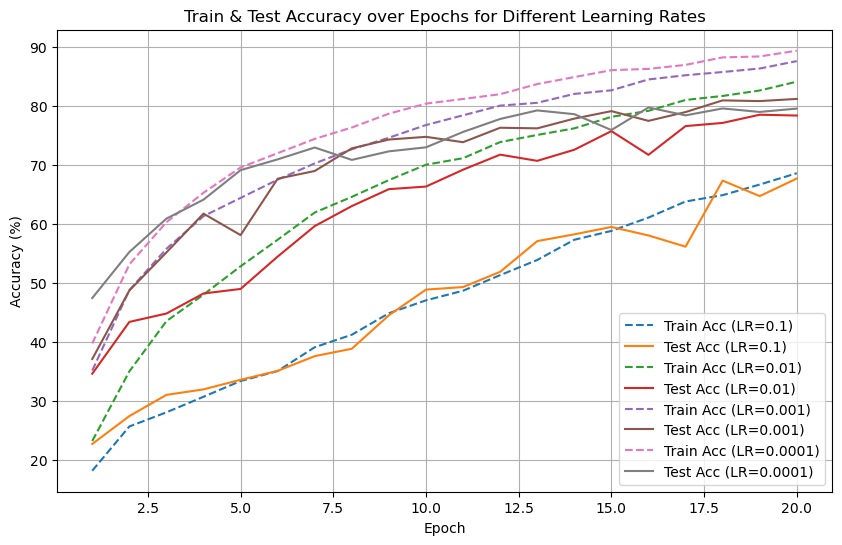

In [4]:
import re
import matplotlib.pyplot as plt

# Données brutes
raw_data = """Learning rate: 0.1
Epoch 1: Train Loss: 2.4734, Train Acc: 18.15%, Test Acc: 22.69%  Learning Rate: 0.1
Epoch 2: Train Loss: 1.9676, Train Acc: 25.65%, Test Acc: 27.41%  Learning Rate: 0.1
Epoch 3: Train Loss: 1.8883, Train Acc: 28.05%, Test Acc: 31.01%  Learning Rate: 0.1
Epoch 4: Train Loss: 1.8251, Train Acc: 30.69%, Test Acc: 31.94%  Learning Rate: 0.1
Epoch 5: Train Loss: 1.7627, Train Acc: 33.36%, Test Acc: 33.57%  Learning Rate: 0.1
Epoch 6: Train Loss: 1.7149, Train Acc: 35.05%, Test Acc: 35.08%  Learning Rate: 0.1
Epoch 7: Train Loss: 1.6308, Train Acc: 39.09%, Test Acc: 37.58%  Learning Rate: 0.1
Epoch 8: Train Loss: 1.5774, Train Acc: 41.21%, Test Acc: 38.83%  Learning Rate: 0.1
Epoch 9: Train Loss: 1.4887, Train Acc: 44.85%, Test Acc: 44.51%  Learning Rate: 0.1
Epoch 10: Train Loss: 1.4330, Train Acc: 47.04%, Test Acc: 48.86%  Learning Rate: 0.1
Epoch 11: Train Loss: 1.3890, Train Acc: 48.67%, Test Acc: 49.29%  Learning Rate: 0.1
Epoch 12: Train Loss: 1.3293, Train Acc: 51.31%, Test Acc: 51.87%  Learning Rate: 0.1
Epoch 13: Train Loss: 1.2544, Train Acc: 53.88%, Test Acc: 57.08%  Learning Rate: 0.1
Epoch 14: Train Loss: 1.1838, Train Acc: 57.31%, Test Acc: 58.23%  Learning Rate: 0.1
Epoch 15: Train Loss: 1.1474, Train Acc: 58.81%, Test Acc: 59.48%  Learning Rate: 0.1
Epoch 16: Train Loss: 1.0815, Train Acc: 61.07%, Test Acc: 58.04%  Learning Rate: 0.1
Epoch 17: Train Loss: 1.0184, Train Acc: 63.80%, Test Acc: 56.14%  Learning Rate: 0.1
Epoch 18: Train Loss: 0.9951, Train Acc: 64.87%, Test Acc: 67.34%  Learning Rate: 0.1
Epoch 19: Train Loss: 0.9460, Train Acc: 66.67%, Test Acc: 64.71%  Learning Rate: 0.1
Epoch 20: Train Loss: 0.8910, Train Acc: 68.59%, Test Acc: 67.69%  Learning Rate: 0.1
Training complete my boss

Learning rate: 0.01
Epoch 1: Train Loss: 2.0999, Train Acc: 23.19%, Test Acc: 34.60%  Learning Rate: 0.01
Epoch 2: Train Loss: 1.7111, Train Acc: 34.99%, Test Acc: 43.38%  Learning Rate: 0.01
Epoch 3: Train Loss: 1.5353, Train Acc: 43.51%, Test Acc: 44.80%  Learning Rate: 0.01
Epoch 4: Train Loss: 1.4178, Train Acc: 48.01%, Test Acc: 48.20%  Learning Rate: 0.01
Epoch 5: Train Loss: 1.3048, Train Acc: 52.81%, Test Acc: 48.97%  Learning Rate: 0.01
Epoch 6: Train Loss: 1.1791, Train Acc: 57.31%, Test Acc: 54.46%  Learning Rate: 0.01
Epoch 7: Train Loss: 1.0757, Train Acc: 61.93%, Test Acc: 59.63%  Learning Rate: 0.01
Epoch 8: Train Loss: 0.9917, Train Acc: 64.58%, Test Acc: 63.02%  Learning Rate: 0.01
Epoch 9: Train Loss: 0.9176, Train Acc: 67.43%, Test Acc: 65.89%  Learning Rate: 0.01
Epoch 10: Train Loss: 0.8501, Train Acc: 70.03%, Test Acc: 66.33%  Learning Rate: 0.01
Epoch 11: Train Loss: 0.8061, Train Acc: 71.14%, Test Acc: 69.19%  Learning Rate: 0.01
Epoch 12: Train Loss: 0.7403, Train Acc: 73.87%, Test Acc: 71.74%  Learning Rate: 0.01
Epoch 13: Train Loss: 0.7048, Train Acc: 75.08%, Test Acc: 70.69%  Learning Rate: 0.01
Epoch 14: Train Loss: 0.6661, Train Acc: 76.20%, Test Acc: 72.57%  Learning Rate: 0.01
Epoch 15: Train Loss: 0.6141, Train Acc: 78.15%, Test Acc: 75.73%  Learning Rate: 0.01
Epoch 16: Train Loss: 0.5807, Train Acc: 79.17%, Test Acc: 71.71%  Learning Rate: 0.01
Epoch 17: Train Loss: 0.5318, Train Acc: 81.01%, Test Acc: 76.58%  Learning Rate: 0.01
Epoch 18: Train Loss: 0.5142, Train Acc: 81.69%, Test Acc: 77.12%  Learning Rate: 0.01
Epoch 19: Train Loss: 0.4877, Train Acc: 82.62%, Test Acc: 78.51%  Learning Rate: 0.01
Epoch 20: Train Loss: 0.4467, Train Acc: 84.11%, Test Acc: 78.37%  Learning Rate: 0.01
Training complete my boss

Learning rate: 0.001
Epoch 1: Train Loss: 1.7510, Train Acc: 35.13%, Test Acc: 37.09%  Learning Rate: 0.001
Epoch 2: Train Loss: 1.3894, Train Acc: 48.77%, Test Acc: 48.70%  Learning Rate: 0.001
Epoch 3: Train Loss: 1.2205, Train Acc: 55.77%, Test Acc: 55.16%  Learning Rate: 0.001
Epoch 4: Train Loss: 1.0774, Train Acc: 61.31%, Test Acc: 61.74%  Learning Rate: 0.001
Epoch 5: Train Loss: 0.9873, Train Acc: 64.40%, Test Acc: 58.10%  Learning Rate: 0.001
Epoch 6: Train Loss: 0.9025, Train Acc: 67.50%, Test Acc: 67.66%  Learning Rate: 0.001
Epoch 7: Train Loss: 0.8323, Train Acc: 70.26%, Test Acc: 68.97%  Learning Rate: 0.001
Epoch 8: Train Loss: 0.7729, Train Acc: 72.65%, Test Acc: 72.81%  Learning Rate: 0.001
Epoch 9: Train Loss: 0.7142, Train Acc: 74.61%, Test Acc: 74.30%  Learning Rate: 0.001
Epoch 10: Train Loss: 0.6623, Train Acc: 76.76%, Test Acc: 74.76%  Learning Rate: 0.001
Epoch 11: Train Loss: 0.6130, Train Acc: 78.41%, Test Acc: 73.85%  Learning Rate: 0.001
Epoch 12: Train Loss: 0.5729, Train Acc: 80.05%, Test Acc: 76.30%  Learning Rate: 0.001
Epoch 13: Train Loss: 0.5454, Train Acc: 80.53%, Test Acc: 76.20%  Learning Rate: 0.001
Epoch 14: Train Loss: 0.5103, Train Acc: 82.04%, Test Acc: 77.85%  Learning Rate: 0.001
Epoch 15: Train Loss: 0.4824, Train Acc: 82.65%, Test Acc: 79.12%  Learning Rate: 0.001
Epoch 16: Train Loss: 0.4476, Train Acc: 84.49%, Test Acc: 77.47%  Learning Rate: 0.001
Epoch 17: Train Loss: 0.4189, Train Acc: 85.20%, Test Acc: 78.96%  Learning Rate: 0.001
Epoch 18: Train Loss: 0.4025, Train Acc: 85.75%, Test Acc: 80.94%  Learning Rate: 0.001
Epoch 19: Train Loss: 0.3857, Train Acc: 86.34%, Test Acc: 80.82%  Learning Rate: 0.001
Epoch 20: Train Loss: 0.3537, Train Acc: 87.60%, Test Acc: 81.19%  Learning Rate: 0.001
Training complete my boss

Learning rate: 0.0001
Epoch 1: Train Loss: 1.6348, Train Acc: 39.73%, Test Acc: 47.43%  Learning Rate: 0.0001
Epoch 2: Train Loss: 1.2877, Train Acc: 53.13%, Test Acc: 55.23%  Learning Rate: 0.0001
Epoch 3: Train Loss: 1.1114, Train Acc: 60.28%, Test Acc: 60.89%  Learning Rate: 0.0001
Epoch 4: Train Loss: 0.9660, Train Acc: 65.28%, Test Acc: 64.11%  Learning Rate: 0.0001
Epoch 5: Train Loss: 0.8618, Train Acc: 69.57%, Test Acc: 69.11%  Learning Rate: 0.0001
Epoch 6: Train Loss: 0.7757, Train Acc: 71.99%, Test Acc: 70.94%  Learning Rate: 0.0001
Epoch 7: Train Loss: 0.7145, Train Acc: 74.41%, Test Acc: 72.95%  Learning Rate: 0.0001
Epoch 8: Train Loss: 0.6602, Train Acc: 76.34%, Test Acc: 70.85%  Learning Rate: 0.0001
Epoch 9: Train Loss: 0.6003, Train Acc: 78.69%, Test Acc: 72.30%  Learning Rate: 0.0001
Epoch 10: Train Loss: 0.5623, Train Acc: 80.39%, Test Acc: 72.98%  Learning Rate: 0.0001
Epoch 11: Train Loss: 0.5313, Train Acc: 81.18%, Test Acc: 75.59%  Learning Rate: 0.0001
Epoch 12: Train Loss: 0.5018, Train Acc: 81.99%, Test Acc: 77.79%  Learning Rate: 0.0001
Epoch 13: Train Loss: 0.4606, Train Acc: 83.71%, Test Acc: 79.24%  Learning Rate: 0.0001
Epoch 14: Train Loss: 0.4394, Train Acc: 84.89%, Test Acc: 78.60%  Learning Rate: 0.0001
Epoch 15: Train Loss: 0.3997, Train Acc: 86.06%, Test Acc: 75.91%  Learning Rate: 0.0001
Epoch 16: Train Loss: 0.3875, Train Acc: 86.28%, Test Acc: 79.74%  Learning Rate: 0.0001
Epoch 17: Train Loss: 0.3668, Train Acc: 86.96%, Test Acc: 78.40%  Learning Rate: 0.0001
Epoch 18: Train Loss: 0.3394, Train Acc: 88.23%, Test Acc: 79.57%  Learning Rate: 0.0001
Epoch 19: Train Loss: 0.3271, Train Acc: 88.39%, Test Acc: 78.98%  Learning Rate: 0.0001
Epoch 20: Train Loss: 0.3043, Train Acc: 89.36%, Test Acc: 79.55%  Learning Rate: 0.0001
Training complete my boss"""

# Définition des regex
lr_pattern = re.compile(r"Learning rate: ([\d\.]+)")
epoch_pattern = re.compile(r"Epoch (\d+): Train Loss: [\d\.]+, Train Acc: ([\d\.]+)%, Test Acc: ([\d\.]+)%")

# Parsing des données
data = {}
current_lr = None

for line in raw_data.split("\n"):
    lr_match = lr_pattern.search(line)
    epoch_match = epoch_pattern.search(line)

    if lr_match:
        current_lr = float(lr_match.group(1))
        data[current_lr] = {"epochs": [], "train_acc": [], "test_acc": []}

    if epoch_match and current_lr is not None:
        epoch = int(epoch_match.group(1))
        train_acc = float(epoch_match.group(2))
        test_acc = float(epoch_match.group(3))
        data[current_lr]["epochs"].append(epoch)
        data[current_lr]["train_acc"].append(train_acc)
        data[current_lr]["test_acc"].append(test_acc)

# Tracer les courbes
plt.figure(figsize=(10, 6))

for lr, values in data.items():
    plt.plot(values["epochs"], values["train_acc"], linestyle="dashed", label=f"Train Acc (LR={lr})")
    plt.plot(values["epochs"], values["test_acc"], label=f"Test Acc (LR={lr})")

plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Train & Test Accuracy over Epochs for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()
